# Data Source, Contents & Data Quality Analysis (DQA)

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")


In [ ]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [ ]:
print(df.shape)

(48842, 11)


In [ ]:
#check for missing values.... no missing values reported
print(df.isna().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [ ]:
print(df.describe())

                  y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


In [ ]:
#cheking columns type of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
None


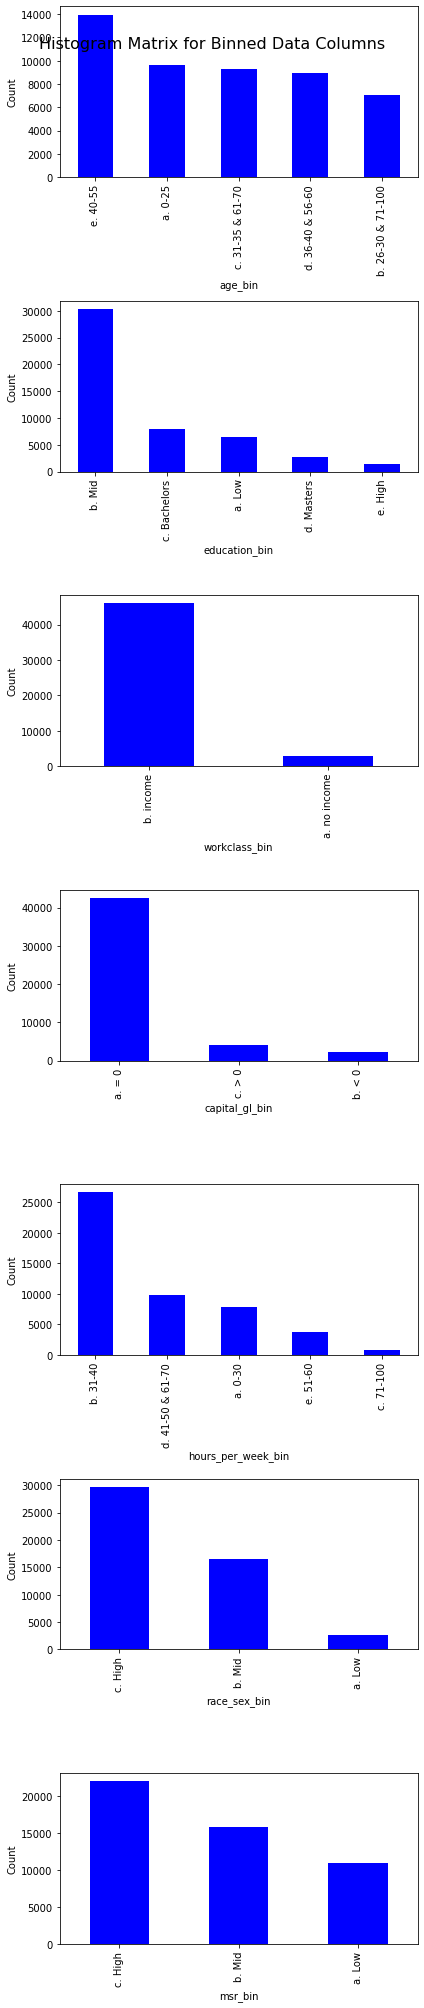

In [ ]:
binned_columns = ['age_bin', 'education_bin', 'workclass_bin', 'capital_gl_bin', 'hours_per_week_bin','race_sex_bin','msr_bin']
binned_data = df[binned_columns]

#created histogram matrix to show distributions between binned columns and detect outliers
fig, axs = plt.subplots(nrows=len(binned_columns), figsize=(6,28))
for i, col in enumerate(binned_columns):
    binned_data[col].value_counts().plot(kind='bar', ax=axs[i], color='blue')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
plt.suptitle('Histogram Matrix for Binned Data Columns', size=16)
plt.tight_layout()
#show histogram matrix
plt.show()

# Build Decision Tree Classifier Models


In [ ]:
#split the df according to train & fit data
train = df[df['flag'] == 'train']
test = df[df['flag'] == 'test']

In [ ]:
x_train = pd.get_dummies(train[['age_bin', 'education_bin', 'workclass_bin', 'capital_gl_bin', 'hours_per_week_bin','race_sex_bin','msr_bin']],drop_first=True)
y_train = train['y']

In [ ]:
x_test = pd.get_dummies(test[['age_bin', 'education_bin', 'workclass_bin', 'capital_gl_bin', 'hours_per_week_bin','race_sex_bin','msr_bin']],drop_first=True)
y_test = test['y']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)
t = t.fit(x_train, y_train)

y_pred = t.predict(x_test)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#check for the sklearn version
import sklearn
print(sklearn.__version__)

1.0.2


# Evaluate Decision Tree Performance

In [ ]:
import sklearn.metrics as metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# Print Confusion Matrix to describe the number of true positives, false positives, 
# true negatives and false negatives 

df_confusion_matrix = confusion_matrix(y_test,y_pred)
print(df_confusion_matrix)

[[11662   773]
 [ 1866  1980]]


In [ ]:
#accuracy of the model 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)

Accuracy Score: 0.8379092193354216


In [ ]:
# Check Performance

# Printing classifier report after prediction
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12435
           1       0.72      0.51      0.60      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.73      0.75     16281
weighted avg       0.83      0.84      0.83     16281



# Tune Decision Tree Performance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# Train and evaluate the model for different maximum depths
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
results = {'Accuracy': [], 'Recall': [], 'Precision': [], 'F1 Score': []}
for depth in max_depth_options:
    model = DecisionTreeClassifier(max_depth=depth, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results['Accuracy'].append(accuracy)
    results['Recall'].append(recall)
    results['Precision'].append(precision)
    results['F1 Score'].append(f1)

# Create a data frame from the results
df_max_depth   = pd.DataFrame(results, index=max_depth_options)

In [ ]:
df_max_depth  

Accuracy    Recall  Precision  F1 Score
2   0.790431  0.168227   0.752326  0.274968
4   0.822431  0.469059   0.679985  0.555162
6   0.832688  0.495580   0.708550  0.583231
8   0.834224  0.507020   0.708318  0.590999
10  0.837848  0.510660   0.721528  0.598051
12  0.837234  0.503900   0.723134  0.593932
14  0.837049  0.500520   0.724501  0.592034
16  0.836619  0.500000   0.722932  0.591147
18  0.836804  0.501040   0.723077  0.591921
20  0.836804  0.500780   0.723244  0.591796

In [ ]:
# Train and evaluate the model for different maximum features
max_feature_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
results1 = {'Accuracy': [], 'Recall': [], 'Precision': [], 'F1 Score': []}
for feature in max_feature_options:
    model = DecisionTreeClassifier(max_features=feature, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results1['Accuracy'].append(accuracy)
    results1['Recall'].append(recall)
    results1['Precision'].append(precision)
    results1['F1 Score'].append(f1)

# Create a data frame from the results
df_max_feature = pd.DataFrame(results1, index=max_feature_options)

In [ ]:
df_max_feature

Accuracy   Recall  Precision  F1 Score
0.3  0.836435  0.49974   0.722285  0.590748
0.4  0.836189  0.50078   0.720539  0.590888
0.5  0.835575  0.49844   0.719325  0.588850
0.6  0.835698  0.49948   0.719206  0.589535
0.7  0.836067  0.50104   0.719836  0.590832
0.8  0.836312  0.50026   0.721410  0.590818

In [ ]:
# Train and evaluate the model for different minimum sample leaf values
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results2 = {'Accuracy': [], 'Recall': [], 'Precision': [], 'F1 Score': []}
for sample_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(min_samples_leaf=sample_leaf, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results2['Accuracy'].append(accuracy)
    results2['Recall'].append(recall)
    results2['Precision'].append(precision)
    results2['F1 Score'].append(f1)

# Create a data frame from the results
df_min_samples_leaf = pd.DataFrame(results2, index=min_samples_leaf_options)

In [ ]:
df_min_samples_leaf

Accuracy    Recall  Precision  F1 Score
5   0.837479  0.501560   0.725734  0.593173
10  0.838278  0.511700   0.722732  0.599178
15  0.838216  0.512480   0.721978  0.599453
20  0.838646  0.513001   0.723506  0.600335
25  0.838523  0.513261   0.722812  0.600274
30  0.837602  0.511440   0.719985  0.598054
35  0.837418  0.502860   0.724616  0.593707
40  0.837602  0.502340   0.725770  0.593731

In [ ]:
# Train and evaluate the model for different split criteria
split_criteria_options = ['entropy', 'gini']
results3 = {'Accuracy': [], 'Recall': [], 'Precision': [], 'F1 Score': []}
for criteria in split_criteria_options:
    model = DecisionTreeClassifier(criterion=criteria, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results3['Accuracy'].append(accuracy)
    results3['Recall'].append(recall)
    results3['Precision'].append(precision)
    results3['F1 Score'].append(f1)

# Create a data frame from the results
df_split_criteria = pd.DataFrame(results3, index=split_criteria_options)

In [ ]:
df_split_criteria

Accuracy   Recall  Precision  F1 Score
entropy  0.836435  0.50078   0.721619  0.591251
gini     0.836804  0.50078   0.723244  0.591796

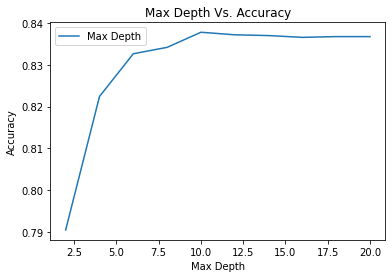

In [ ]:
# plot for df_max_depth
plt.plot(df_max_depth.index, df_max_depth['Accuracy'], label='Max Depth')
plt.title('Max Depth Vs. Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#10 highest acc

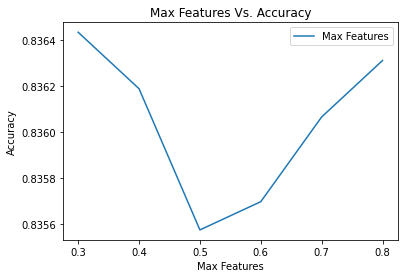

In [ ]:
# plot for df_max_feature
plt.plot(df_max_feature.index, df_max_feature['Accuracy'], label='Max Features')
plt.title('Max Features Vs. Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#0.3 highest acc

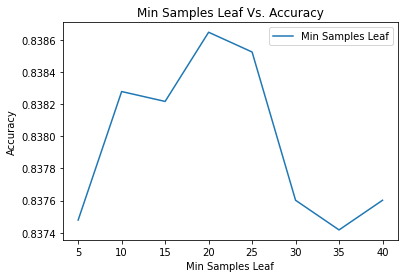

In [ ]:
# plot for df_min_samples_leaf
plt.plot(df_min_samples_leaf.index, df_min_samples_leaf['Accuracy'], label='Min Samples Leaf')
plt.title('Min Samples Leaf Vs. Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#20 highest acc

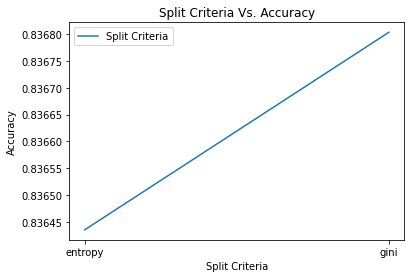

In [ ]:
# plot for df_split_criteria
plt.plot(df_split_criteria.index, df_split_criteria['Accuracy'], label='Split Criteria')
plt.title('Split Criteria Vs. Accuracy')
plt.xlabel('Split Criteria')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#gini highest acc

In [ ]:
#gini highest acc for split criterea,
#20 highest acc for Min Sample leaf,
#0.3 highest acc for max feature,
#10 highest acc for max depth 

# Visualize Your Best Decision Tree using GraphViz

In [ ]:
from sklearn.tree import plot_tree
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz 
import pydotplus

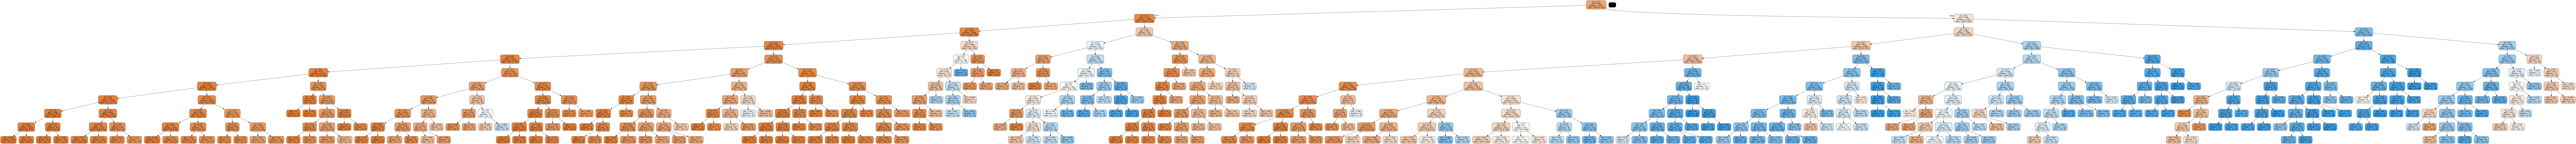

In [ ]:
#plot entire tree using graphviz
dot_data = StringIO()

export_graphviz(t, out_file= dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

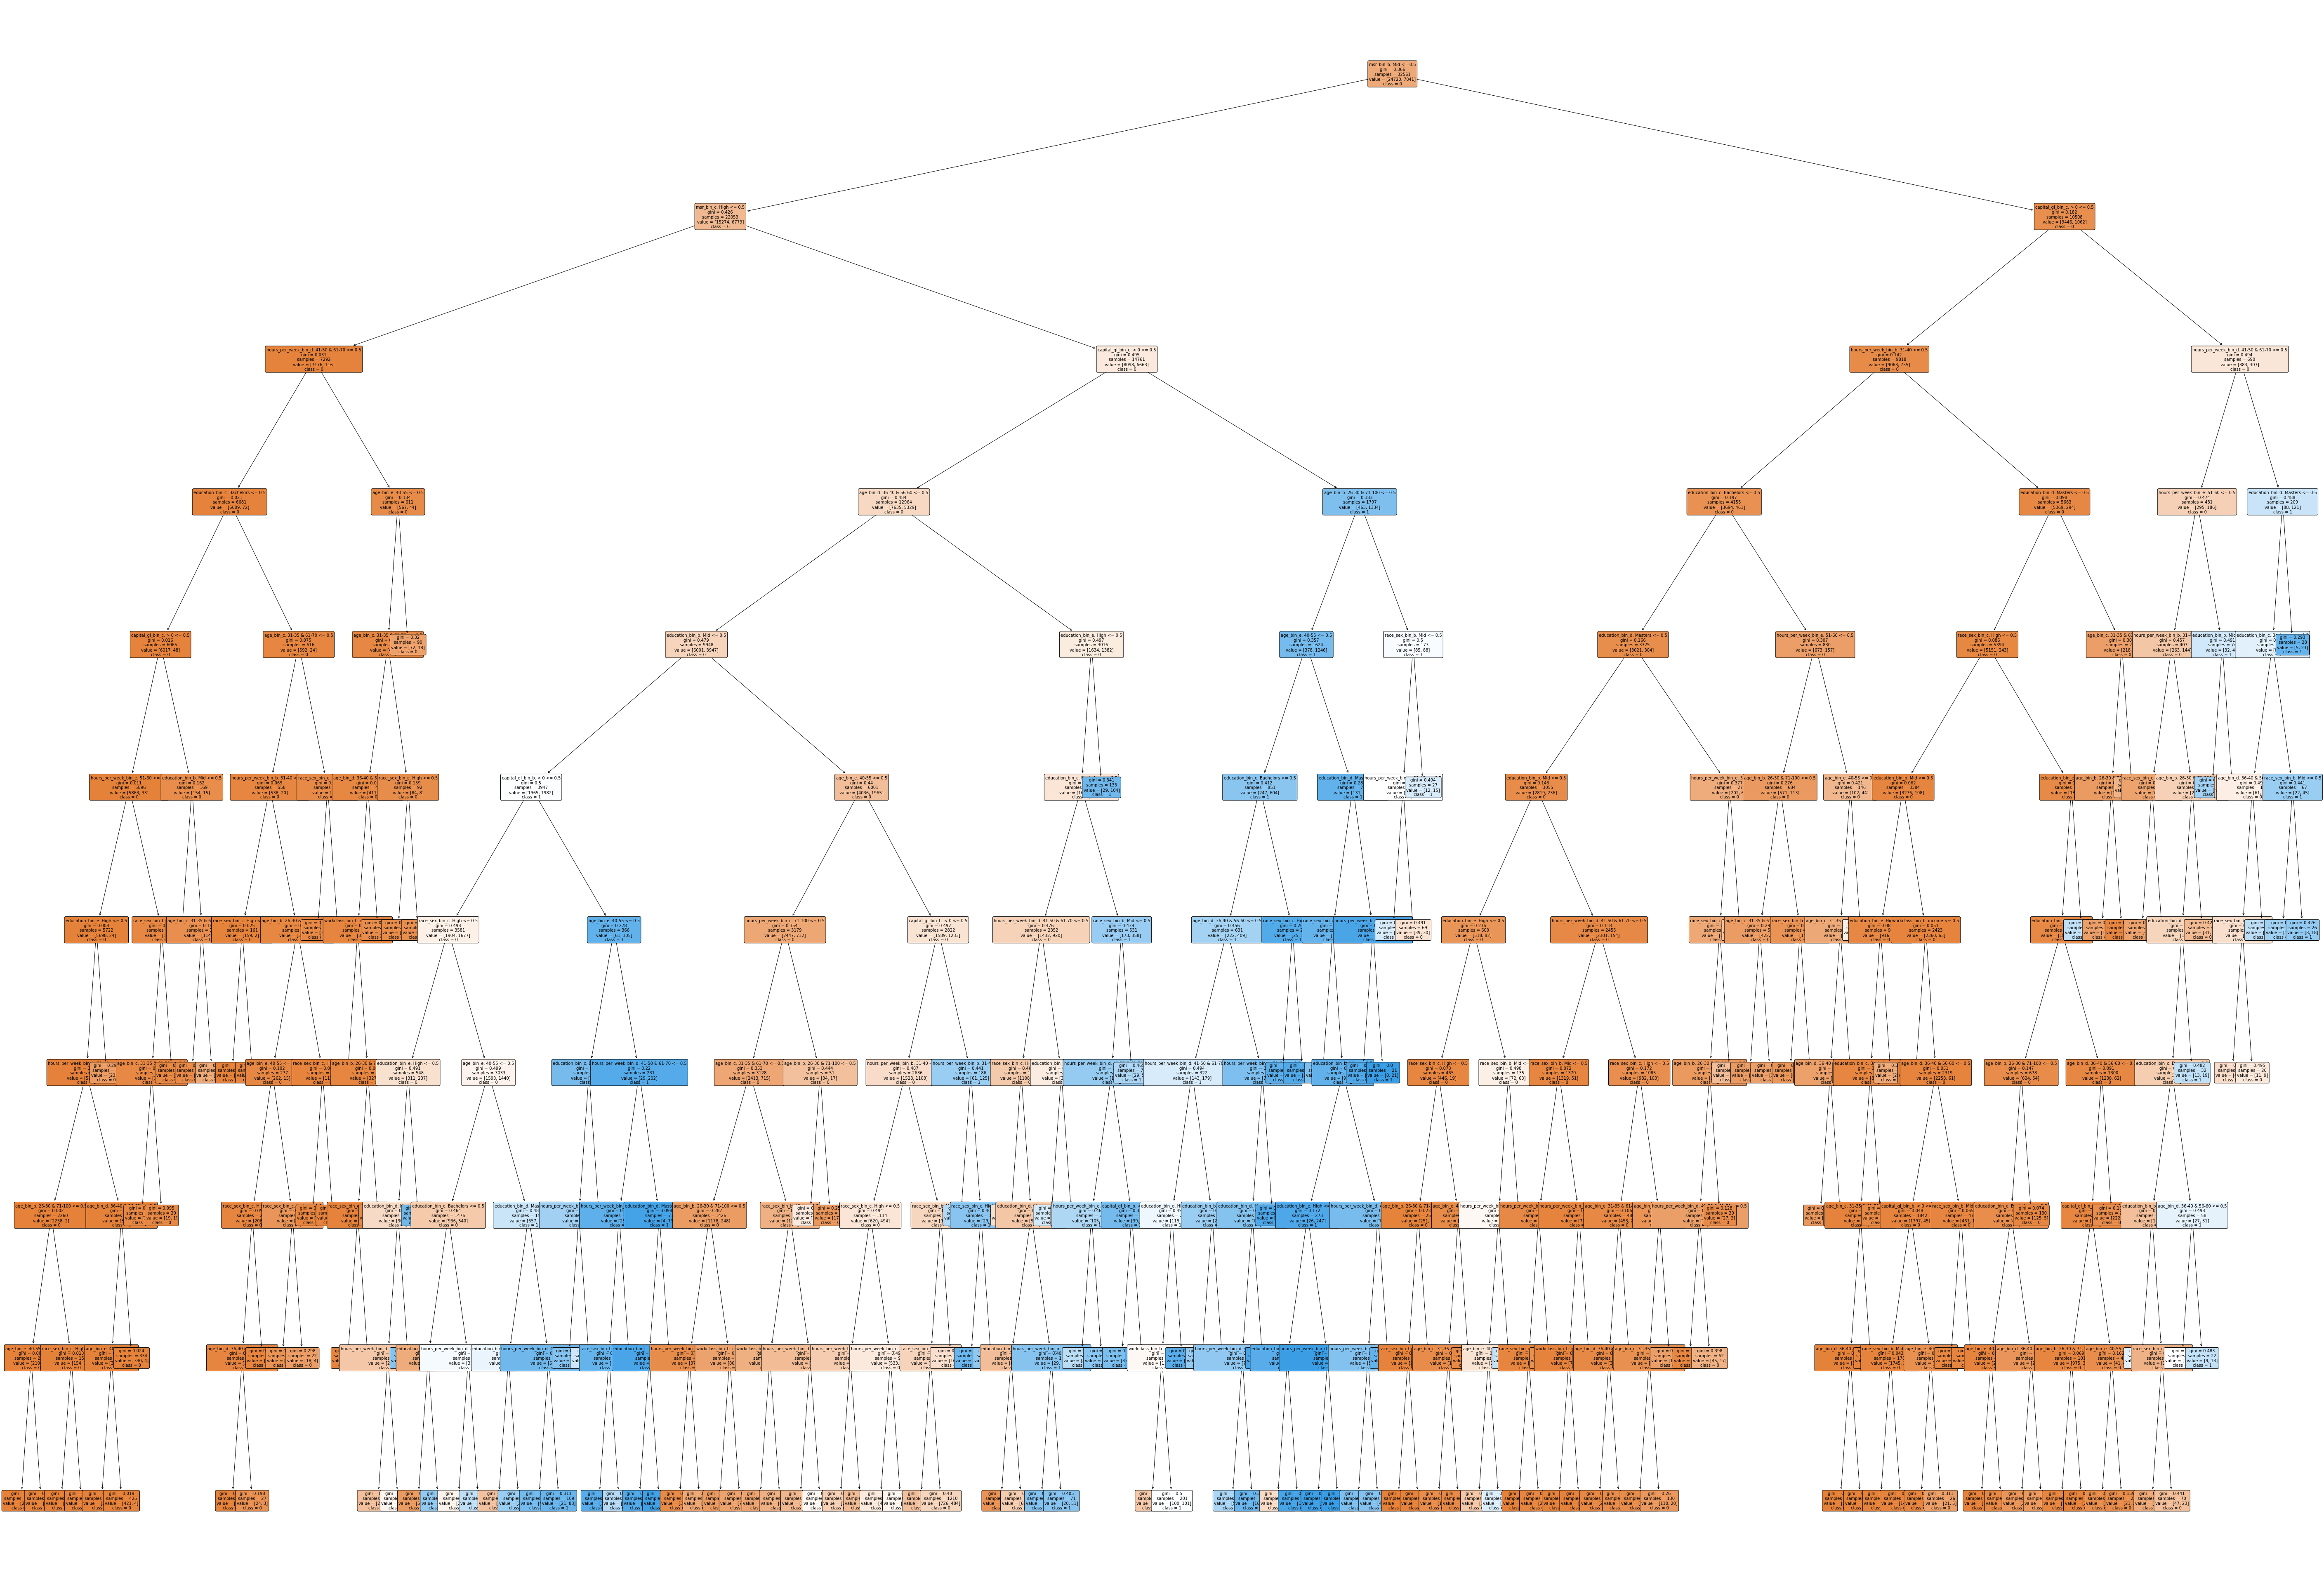

Total runtime: 18.219460010528564 seconds


In [ ]:
# Best decision tree based off of highest accuracy from previous graph
import time

start_time = time.time()

final_tree = DecisionTreeClassifier(criterion='gini', max_features=0.3, min_samples_leaf=20, max_depth=10, random_state=101)
final_tree.fit(x_train, y_train)

plt.figure(figsize=(100,70))
a = plot_tree(final_tree, feature_names=list(x_train), class_names=['0', '1'],
              filled=True, rounded=True, fontsize=10)
plt.show()

end_time = time.time()

print(f"Total runtime: {end_time - start_time} seconds")

# Prediction using your “trained” Decision Tree Mode

Based on the Performance Tuning effort in the previous section

pick your BEST PERFORMING TREE. Now make prediction of a “new” individual’s Income Category ( <=50K,or >50K ) with the following information. Do this in your Notebook.

- Hours Worked per Week = 48
- Occupation Category = Mid - Low
- Marriage Status & Relationships = High
- Capital Gain = Yes
- Race-Sex Group = Mid
- Number of Years of Education = 12
- Education Category = High
- Work Class = Income
- Age = 58

In [ ]:
pred_d = {'age_bin_b. 26-30 & 71-100': 0,
        'age_bin_c. 31-35 & 61-70': 0,
        'age_bin_d. 36-40 & 56-60': 1,
        'age_bin_e. 40-55': 0,
        'education_bin_b. Mid': 0,
        'education_bin_c. Bachelors': 0,
        'education_bin_d. Masters': 1,
        'education_bin_e. High': 0,
        'workclass_bin_b. income': 1,
        'capital_gl_bin_b. < 0': 0,
        'capital_gl_bin_c. > 0': 1,
        'hours_per_week_bin_b. 31-40': 0,
        'hours_per_week_bin_c. 71-100': 0,
        'hours_per_week_bin_d. 41-50 & 61-70': 0,
        'hours_per_week_bin_e. 51-60': 1,
        'race_sex_bin_b. Mid': 1,
        'race_sex_bin_c. High': 0,
        'msr_bin_b. Mid': 0,
        'msr_bin_c. High': 1}

# create DataFrame from dictionary
new_data = pd.DataFrame([pred_d])

In [ ]:
prediction = final_tree.predict(new_data)
print(prediction)
#Final predcition is "1" meaning based off of the given info the income is >50K...

[1]


# Conclustion & Short Answers to Questions


In [ ]:
#Q.1 Why does it makes sense to discretize columns for this problem?
  # In short it is easier to handle and analyze data sets at a large scale.
  # This makes it easier to understand and ultimately in ML models continuous
  # data cannot be handled there for these methods make it work

#Q.2 What might be the issues (if any) if we DID NOT discretize the columns
  # The model would have been unable to capture accurate relation ships between
  # both the input columns and even the target columns. Also data could have
  # been significantly more skewed if outliers have been involved.

#Q.4 How long was your total run time to train the best model?
  # Total runtime: 17.309166431427002 seconds

#Q.5 Did you find the BEST TREE?
  # Yes the tree can be seen in the codes above,
  # it was the best tree due to recieving the 
  # highest accuracy score from all the hyper parameters

#Q.6 Write your observations from the visualization of the best tree
  # Based on the final_tree .... the most crucial features are capital gain, age, and education level.
  # other observations include people with capital gains higher than zero are more likely to have an income of over 50K
  # In short conclusion the major factors that could impact income are again .... age, education level, capital gain, and hours worked per week

#Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)
  # Not really has it has been limited to grow has a max depth of 10 and min sample leaf of 20 have been included,
  # however it can still overfit if the hyperparameters are not completely optimized or if there are issues within the train and test data.

In [ ]:
#Q.8 What is the probability that your prediction for this person is correct?
y_pred = final_tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy score: {accuracy}")  
# 82 %

Accuracy score: 0.8259320680547878
